# 1. Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = (train_data - mean) / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = (test_data - mean) / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(keras.Input(shape=(train_data.shape[1],), name='input'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(1, name='output'))  # 회귀 문제이므로 활성화 함수 없이 1개의 유닛

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

# 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# 모델 학습을 위한 파라미터 설정
epochs = 500
batch_size = 32

# Early Stopping 콜백 설정
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습
history = model.fit(
    train_data,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,  # 20%의 데이터를 검증 세트로 사용
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 537.0320 - mae: 21.3278 - val_loss: 526.8543 - val_mae: 21.1402
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 405.3725 - mae: 18.0488 - val_loss: 356.2482 - val_mae: 16.7569
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 241.5017 - mae: 13.1271 - val_loss: 189.2613 - val_mae: 11.3025
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 114.5486 - mae: 8.4359 - val_loss: 89.2977 - val_mae: 7.1255
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 61.2183 - mae: 5.9483 - val_loss: 56.2549 - val_mae: 5.6600
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 42.3324 - mae: 4.8717 - val_loss: 43.3247 - val_mae: 4.8414
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 32.4511 - mae: 4.0902 - val_loss: 30.3205 - val_mae: 4.1416
Epoch 8/500
11/11 [==============================] - 0s

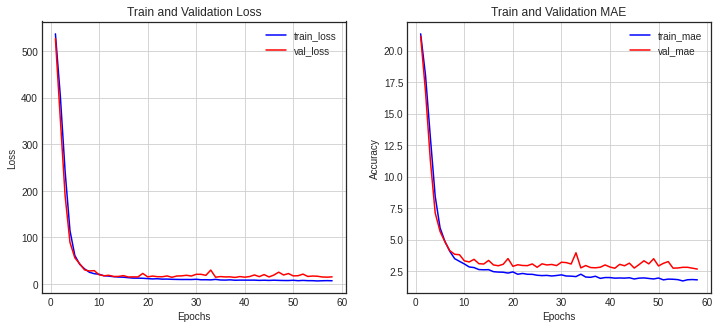

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 23.1174 - mae: 2.9767

테스트 손실 (MSE): 23.12
테스트 MAE: 2.98
샘플 1: 실제 가격: $7.20, 예측 가격: $7.02
샘플 2: 실제 가격: $18.80, 예측 가격: $17.27
샘플 3: 실제 가격: $19.00, 예측 가격: $20.89
샘플 4: 실제 가격: $27.00, 예측 가격: $29.76
샘플 5: 실제 가격: $22.20, 예측 가격: $26.06
샘플 6: 실제 가격: $24.50, 예측 가격: $19.06
샘플 7: 실제 가격: $31.20, 예측 가격: $26.82
샘플 8: 실제 가격: $22.90, 예측 가격: $22.22
샘플 9: 실제 가격: $20.50, 예측 가격: $19.40
샘플 10: 실제 가격: $23.20, 예측 가격: $20.87


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

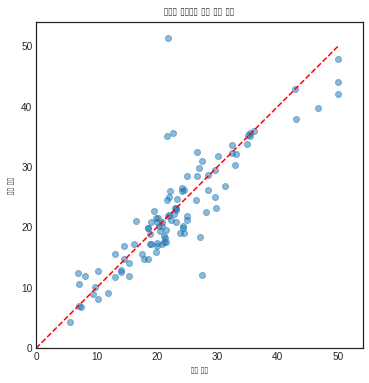

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_

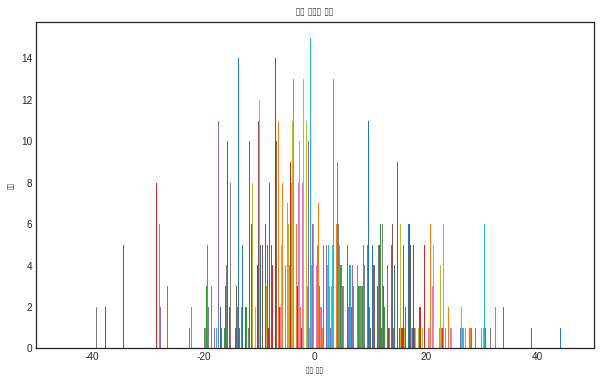

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 테스트 데이터셋을 이용한 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=1)

print(f"\n테스트 손실 (MSE): {test_loss:.2f}")
print(f"테스트 MAE: {test_mae:.2f}")

# 테스트 데이터에 대한 예측 수행
test_predictions = model.predict(test_data)

# 실제 값과 예측 값의 비교 (처음 10개 샘플)
for i in range(10):
    true_price = test_labels[i]
    predicted_price = test_predictions[i][0]
    print(f"샘플 {i+1}: 실제 가격: ${true_price:.2f}, 예측 가격: ${predicted_price:.2f}")

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(test_labels, test_predictions, alpha=0.5)
plt.plot([0, 50], [0, 50], 'r--')  # 완벽한 예측을 나타내는 대각선
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.title('테스트 데이터에 대한 예측 결과')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.show()

# 예측 오차의 분포 시각화
error = test_predictions - test_labels
plt.figure(figsize=(10, 6))
plt.hist(error, bins=50)
plt.xlabel("예측 오차")
plt.ylabel("빈도")
plt.title("예측 오차의 분포")
plt.show()

# 2. Reuters 딥러닝 모델

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split
import numpy as np

# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터에서 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

2121728/2110848 [==============================] - 0s 0us/step


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [18]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# 입력 차원 (특성 수)
input_dim = x_train.shape[1]

# 클래스 수 (46개의 뉴스 주제)
num_classes = 46

# 모델 구성
model = Sequential([
    Dense(256, input_shape=(input_dim,)),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2560256   
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)              

Epoch 1/50
106/106 [==============================] - 3s 11ms/step - loss: 2.1242 - accuracy: 0.5563 - val_loss: 1.6827 - val_accuracy: 0.6821
Epoch 2/50
106/106 [==============================] - 1s 7ms/step - loss: 1.1363 - accuracy: 0.7565 - val_loss: 1.1697 - val_accuracy: 0.7467
Epoch 3/50
106/106 [==============================] - 1s 7ms/step - loss: 0.7968 - accuracy: 0.8229 - val_loss: 1.0284 - val_accuracy: 0.7898
Epoch 4/50
106/106 [==============================] - 1s 7ms/step - loss: 0.5942 - accuracy: 0.8584 - val_loss: 1.0120 - val_accuracy: 0.7983
Epoch 5/50
106/106 [==============================] - 1s 7ms/step - loss: 0.4723 - accuracy: 0.8903 - val_loss: 1.0016 - val_accuracy: 0.8170
Epoch 6/50
106/106 [==============================] - 1s 7ms/step - loss: 0.3790 - accuracy: 0.9114 - val_loss: 1.0348 - val_accuracy: 0.8192
Epoch 7/50
106/106 [==============================] - 1s 7ms/step - loss: 0.3095 - accuracy: 0.9295 - val_loss: 1.0831 - val_accuracy: 0.8139
Epoch

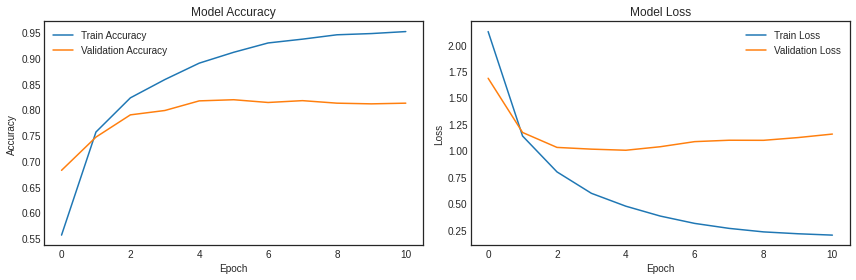

In [19]:
# 콜백 함수 설정
checkpoint_cb = ModelCheckpoint('best_model.h5', 
                                save_best_only=True, 
                                monitor='val_accuracy')
early_stopping_cb = EarlyStopping(patience=5, 
                                  restore_best_weights=True, 
                                  monitor='val_accuracy')

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# 테스트 세트에 대한 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

71/71 [==============================] - 0s 3ms/step - loss: 1.1593 - accuracy: 0.7854
Test accuracy: 0.7854


# 3. CIFAR10 딥러닝 모델

In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [48]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

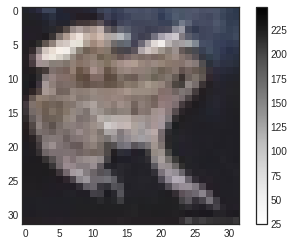

In [49]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [50]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [51]:
# 훈련 데이터 평탄화
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

# 검증 데이터 평탄화
x_val_flattened = x_val.reshape(x_val.shape[0], -1)

# 테스트 데이터 평탄화
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# 변형된 데이터의 형태 출력
print("평탄화된 훈련 데이터 형태:", x_train_flattened.shape)
print("평탄화된 검증 데이터 형태:", x_val_flattened.shape)
print("평탄화된 테스트 데이터 형태:", x_test_flattened.shape)

# 첫 번째 이미지의 차원 확인
print("첫 번째 훈련 이미지의 차원:", x_train_flattened[0].shape)

평탄화된 훈련 데이터 형태: (40000, 3072)
평탄화된 검증 데이터 형태: (10000, 3072)
평탄화된 테스트 데이터 형태: (10000, 3072)
첫 번째 훈련 이미지의 차원: (3072,)


In [52]:
from tensorflow.keras.utils import to_categorical

# 레이블 데이터를 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [53]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10의 클래스 수는 10개입니다.
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

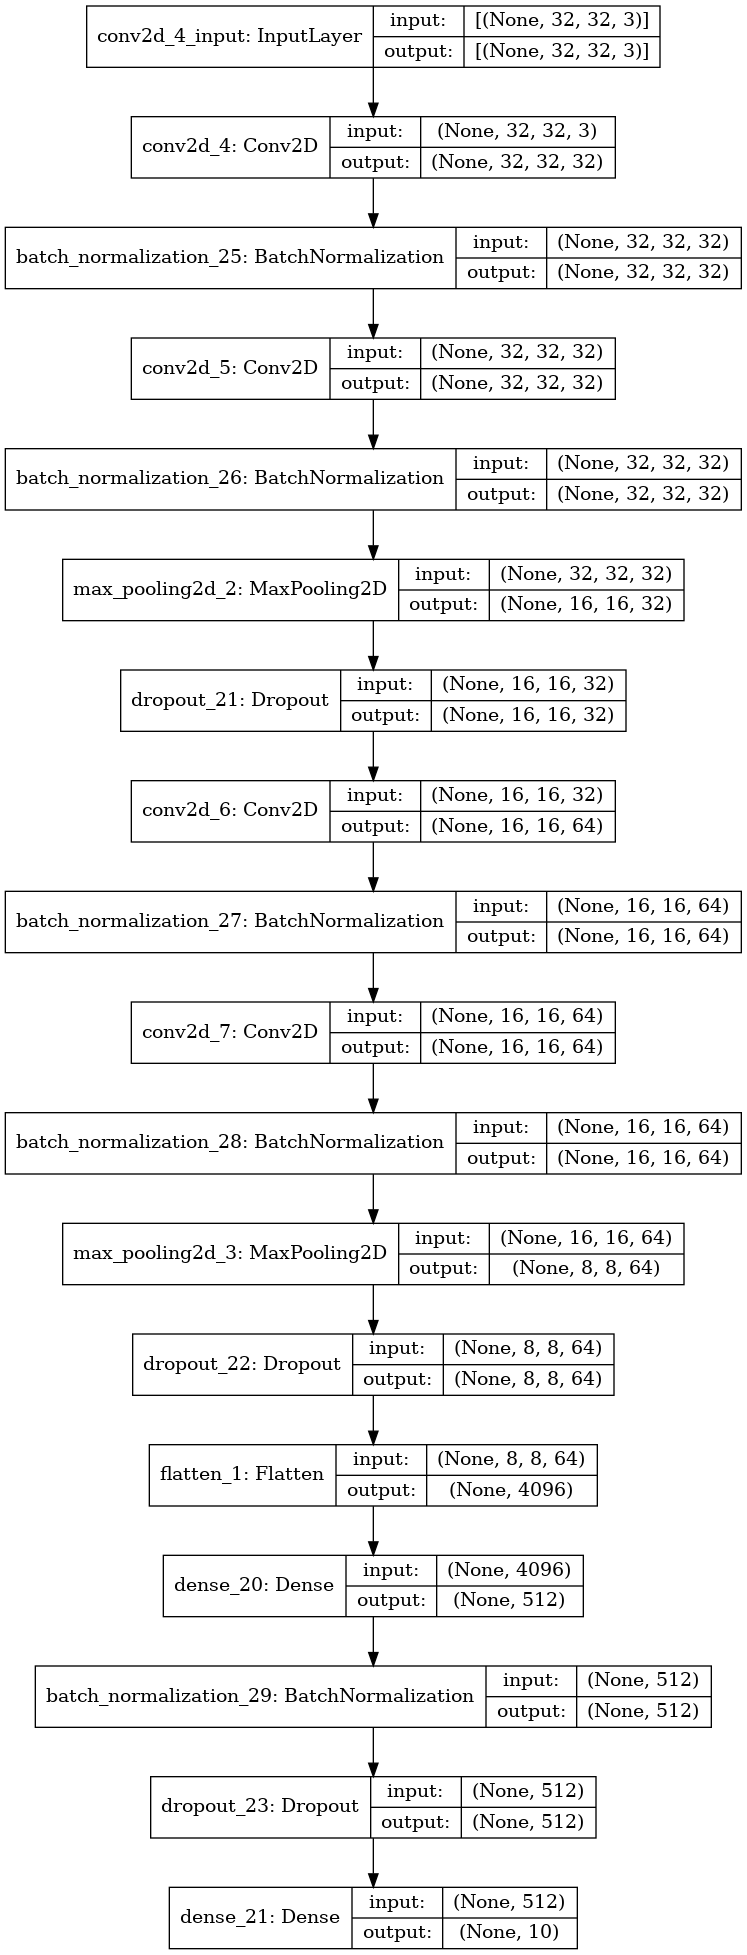

In [56]:
utils.plot_model(model, show_shapes=True)

Epoch 1/50
625/625 [==============================] - 28s 9ms/step - loss: 1.5281 - accuracy: 0.4927 - val_loss: 1.1237 - val_accuracy: 0.5972

Epoch 00001: val_accuracy improved from -inf to 0.59720, saving model to ./model_checkpoints/best_model.h5
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 1.0082 - accuracy: 0.6419 - val_loss: 0.9722 - val_accuracy: 0.6561

Epoch 00002: val_accuracy improved from 0.59720 to 0.65610, saving model to ./model_checkpoints/best_model.h5
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.8671 - accuracy: 0.6960 - val_loss: 0.8717 - val_accuracy: 0.6904

Epoch 00003: val_accuracy improved from 0.65610 to 0.69040, saving model to ./model_checkpoints/best_model.h5
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.7784 - accuracy: 0.7253 - val_loss: 0.8033 - val_accuracy: 0.7233

Epoch 00004: val_accuracy improved from 0.69040 to 0.72330, saving model to ./model_checkpoints/best

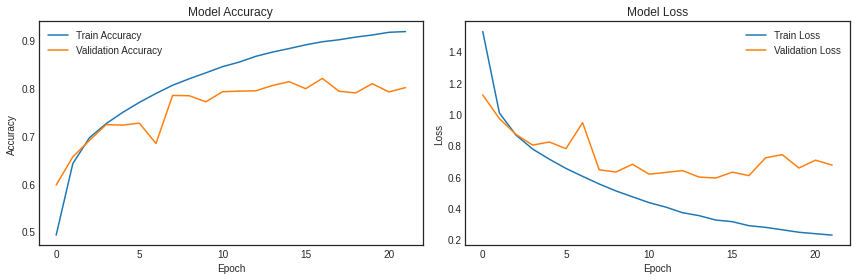

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 모델 저장을 위한 디렉토리 생성
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# ModelCheckpoint 콜백 설정
checkpoint_path = os.path.join(checkpoint_dir, 'best_model.h5')
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# EarlyStopping 콜백 설정
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
# 테스트 세트에 대한 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8160
